# SPRINT 1 DEPARTAMENTO DE FINANZAS

In [57]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats



In [58]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing.parquet')
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11163 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11163 non-null  object 
 4   education      11163 non-null  object 
 5   is_in_default  11163 non-null  int64  
 6   balance        11163 non-null  int64  
 7   housing        11163 non-null  int64  
 8   loan           11163 non-null  int64  
 9   contact        11163 non-null  object 
 10  day            11163 non-null  int64  
 11  month          11163 non-null  object 
 12  duration       11163 non-null  int64  
 13  campaign       11163 non-null  int64  
 14  pdays          11163 non-null  int64  
 15  previous       11163 non-null  int64  
 16  poutcome       11163 non-null  object 
 17  deposit        11163 non-null  int64  
dtypes: flo

## EDA (Exploratory Data Analisis)

Procedemos a revisar nuestro dataframe para observar posibles anomalias.

In [59]:
df_f = df_BANK_marketing[['id','age','job','marital','is_in_default','balance','housing','loan']]
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11163 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11163 non-null  object 
 4   is_in_default  11163 non-null  int64  
 5   balance        11163 non-null  int64  
 6   housing        11163 non-null  int64  
 7   loan           11163 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 697.8+ KB


In [60]:
df_f.shape

(11163, 8)

In [61]:
df_f.head()

,id,age,job,marital,is_in_default,balance,housing,loan
0,1,59.0,admin.,married,0,2343,1,0
1,2,59.0,admin.,married,0,2343,1,0
2,3,56.0,admin.,married,0,45,0,0
3,4,41.0,technician,married,0,1270,1,0
4,5,55.0,services,married,0,2476,1,0


Vemos que el dataframe está correcto y preparado para empezar con el análisis.

In [62]:
df_f.describe().round()

,id,age,is_in_default,balance,housing,loan
count,11163.0,11163.0,11163.0,11163.0,11163.0,11163.0
mean,5582.0,41.0,0.0,1529.0,0.0,0.0
std,3223.0,12.0,0.0,3225.0,0.0,0.0
min,1.0,18.0,0.0,-6847.0,0.0,0.0
25%,2792.0,32.0,0.0,122.0,0.0,0.0
50%,5582.0,39.0,0.0,550.0,0.0,0.0
75%,8372.0,49.0,0.0,1708.0,1.0,0.0
max,11163.0,95.0,1.0,81204.0,1.0,1.0


Se puede observar que balance tiene mucha dispersión ya que su mínima es negativa (-6847) y su máxima es muy alta(81204), el dataset no tiene nulos y las variables que tenemos corresponden con los tipos de datos.


In [63]:
categorical_columns = df_f.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

for col in categorical_columns:
    print(f"Variable categórica: {col}")
    print(f"Valores y frecuencias:\n{df_f[col].value_counts()}")
    print("-" * 40)


Index(['job', 'marital'], dtype='object')
Variable categórica: job
Valores y frecuencias:
job
management       2566
blue-collar      1944
technician       1823
admin.           1335
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
----------------------------------------
Variable categórica: marital
Valores y frecuencias:
marital
married     6354
single      3518
divorced    1291
Name: count, dtype: int64
----------------------------------------


Se puede observar que en la variable de job tenemos 70 unkonwns, es un número que más adelante se podría considerar, pero de momento se imputa. Por otro lado la variable marital refleja números correctos.

In [64]:
balance_negativo = df_f[df_f['balance'] < 0].shape[0]
balance_negativo

688

Si realizamos el porcentaje, (688/11163*100), vemos que el porcentaje total de clientes con balance negativo es del 6.16%. Estos clientes tienen un riesgo potencial de incumplimiento de pago.

In [65]:
df_f['is_in_default'].value_counts()


is_in_default
0    10995
1      168
Name: count, dtype: int64

### Visualizaciones iniciales

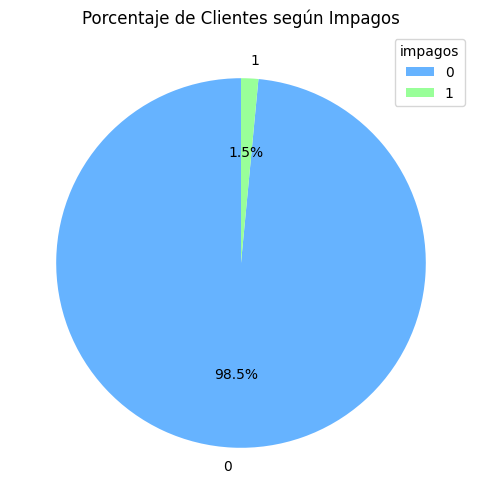

In [66]:
iid_counts = df_f['is_in_default'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(iid_counts, labels=iid_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Porcentaje de Clientes según Impagos')
plt.legend(iid_counts.index, title="impagos", loc="best") 
plt.show()

En el gráfico podemos observar que la cantidad de clientes con impagos es un 1.5% del total, es bajo, pero pueden ser críticos para el devenir de la compañía.

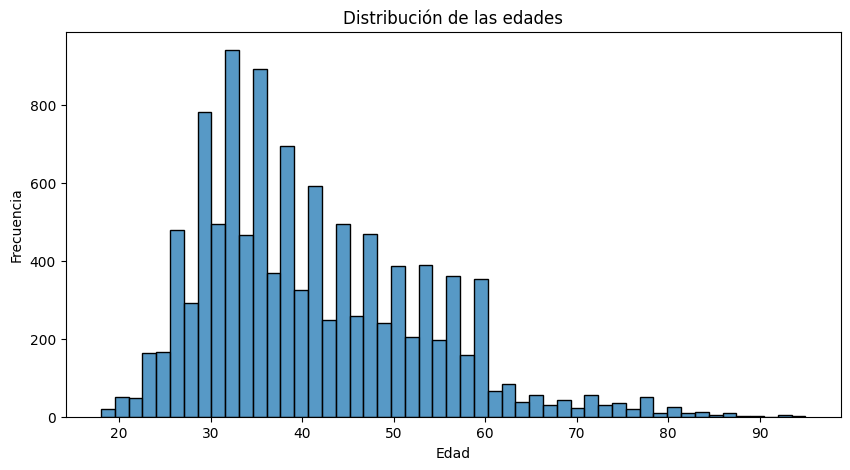

In [67]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['age'])
plt.title('Distribución de las edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Podemos observar que el grueso de las edades se mueve entre los 25 y los 60 años, con la mayoria situada entorno a los 30 y los 40 años.

In [68]:
edades = df_f['age'].value_counts()
edades

age
31.0    496
32.0    476
33.0    466
34.0    466
35.0    461
       ... 
92.0      2
93.0      2
88.0      2
95.0      1
89.0      1
Name: count, Length: 76, dtype: int64

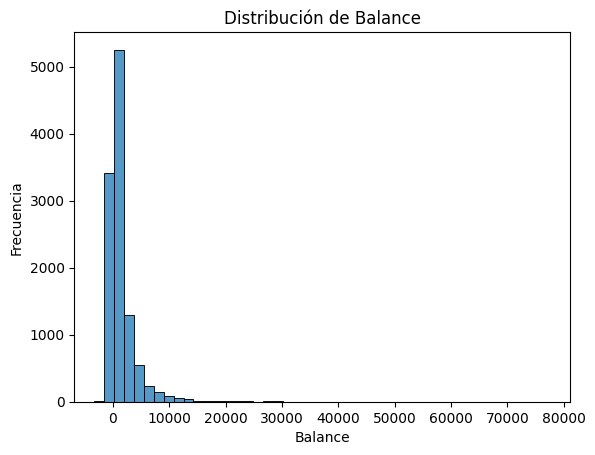

In [69]:
sns.histplot(df_f['balance'], bins=50)
plt.xlim(df_f['balance'].min(), df_f['balance'].max())  # Limitar el eje x al rango de balance
plt.title('Distribución de Balance')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

En el gráfico, el balance mayoritario se encuentra entorno a los 2000, esto puede indicarnos que la mayoría de clientes del banco o tiene una gran cantidad de saldo.

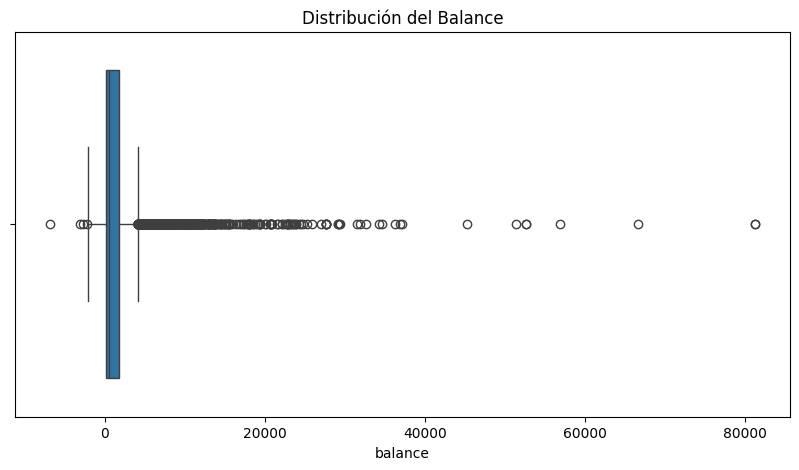

In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='balance')
plt.title('Distribución del Balance')
plt.show()

In [71]:
df_f['balance'].value_counts()

balance
 0        774
 1         39
 3         35
 2         34
 4         29
         ... 
 9447       1
 1924       1
 5806       1
 20138      1
-134        1
Name: count, Length: 3805, dtype: int64

Al ver el resultado del boxplot junto con el contaje del balance, nos damos cuenta, que balance 0 es el que tiene más clientes, ¿este valor puede decirnos que son clientes con nuevas cuentas, que no tienen deuda o clientes a 0 con deuda?

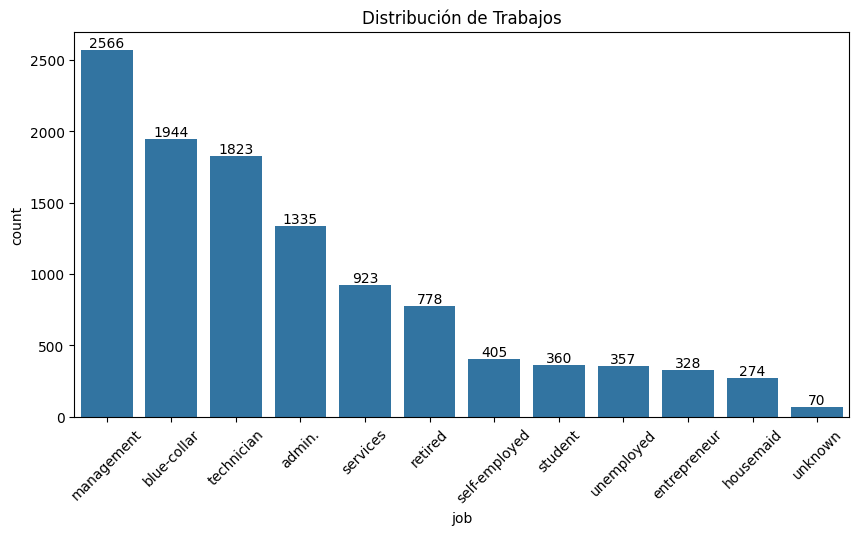

In [72]:
plt.figure(figsize=(10, 5))
num_job = sns.countplot(data=df_f, x='job', order=df_f['job'].value_counts().index)
for bar in num_job.containers: # número en las barras
    num_job.bar_label(bar)
plt.title('Distribución de Trabajos')
plt.xticks(rotation=45)
plt.show()



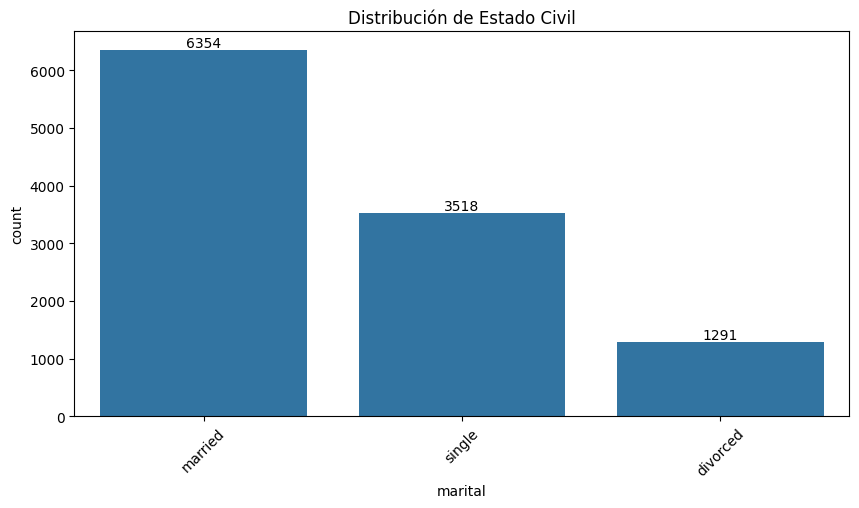

In [73]:
plt.figure(figsize=(10, 5))
num_marital = sns.countplot(data=df_f, x='marital', order=df_f['marital'].value_counts().index)
for bar in num_marital.containers: # número en las barras
    num_marital.bar_label(bar)
plt.title('Distribución de Estado Civil')
plt.xticks(rotation=45)
plt.show()

In [74]:
df_f[['age', 'balance','is_in_default']].corr()


,age,balance,is_in_default
age,1.000000,0.112245,-0.011482
balance,0.112245,1.000000,-0.060956
is_in_default,-0.011482,-0.060956,1.000000


### Relaciones variables con impagos

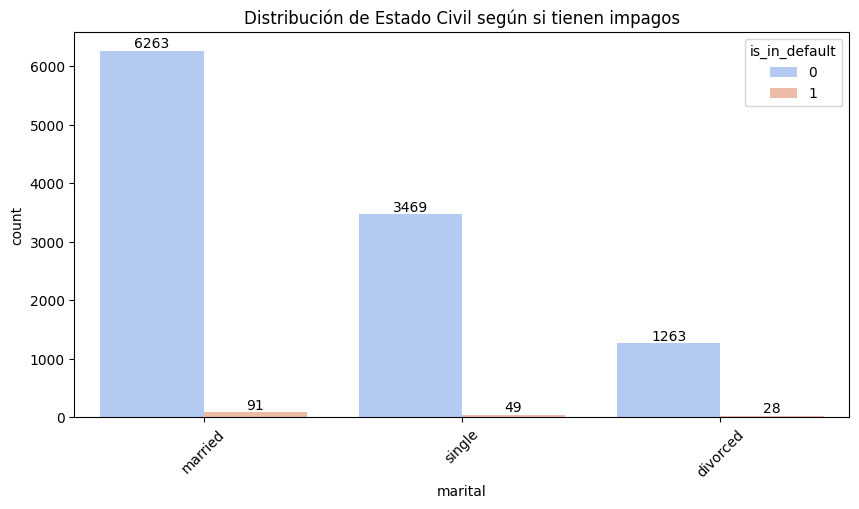

In [75]:
plt.figure(figsize=(10, 5))
num_marital = sns.countplot(data=df_f, x='marital', order=df_f['marital'].value_counts().index, hue = 'is_in_default',palette='coolwarm')
for bar in num_marital.containers: # número en las barras
    num_marital.bar_label(bar)
plt.title('Distribución de Estado Civil según si tienen impagos')
plt.xticks(rotation=45)
plt.show()

#### Prueba Chi-cuadrado marital

In [76]:
crosstab_marital = pd.crosstab(df_f['marital'], df_f['is_in_default'])

# Cálculo de la Chi cuadrado y p-valor
chi2, p, dof, expected = stats.chi2_contingency(crosstab_marital)

print(crosstab_marital)
print("Valor de Chi cuadrado:", chi2)
print("P-valor:", p)



is_in_default     0   1
marital                
divorced       1263  28
married        6263  91
single         3469  49
Valor de Chi cuadrado: 4.364243869453994
P-valor: 0.1128019182018749


La prueba indica, que no hay relación entre estas variables, por lo tanto se desestimarán para el análisis.

In [77]:

crosstab_marital['%_0'] = ((crosstab_marital[0] / crosstab_marital.sum(axis=1)) * 100).round(2)
crosstab_marital['%_1'] = ((crosstab_marital[1] / crosstab_marital.sum(axis=1)) * 100).round(2)
print(crosstab_marital)


is_in_default     0   1    %_0   %_1
marital                             
divorced       1263  28  97.83  2.02
married        6263  91  98.57  1.41
single         3469  49  98.61  1.35


Los datos resultantes nos muestran que el porcentaje de impagos según el estado civil es mayoritário en los divorciados. Mientras que entre los casados y solteros tienen un porcentaje similar, esto puede indicar que los clientes divorciados tienen un poco más de rieso de impago que el resto de clientes

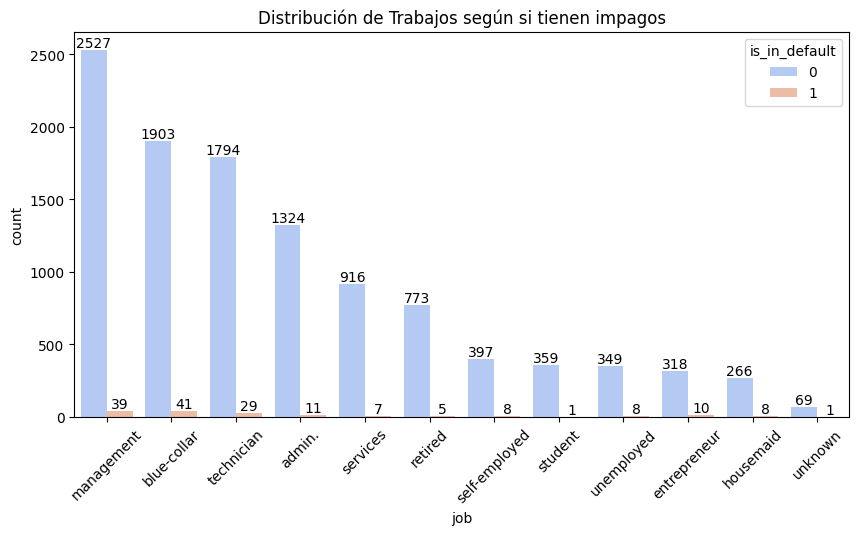

In [78]:
plt.figure(figsize=(10, 5))
num_job = sns.countplot(data=df_f, x='job', order=df_f['job'].value_counts().index, hue = 'is_in_default',palette='coolwarm')
for bar in num_job.containers: # número en las barras
    num_job.bar_label(bar)
plt.title('Distribución de Trabajos según si tienen impagos')
plt.xticks(rotation=45)
plt.show()

#### Prueba Chi-cuadrado job

In [79]:
crosstab_job = pd.crosstab(df_f['job'], df_f['is_in_default'])
# Cálculo de la Chi cuadrado y p-valor
chi2, p, dof, expected = stats.chi2_contingency(crosstab_job)

print(crosstab_job)
print("Valor de Chi cuadrado:", chi2)
print("P-valor:", p)


is_in_default     0   1
job                    
admin.         1324  11
blue-collar    1903  41
entrepreneur    318  10
housemaid       266   8
management     2527  39
retired         773   5
self-employed   397   8
services        916   7
student         359   1
technician     1794  29
unemployed      349   8
unknown          69   1
Valor de Chi cuadrado: 30.972406105356733
P-valor: 0.0011127109290885889


Con el resultado del Chi-cuadrado podemos decir que si hay relación entre el trabajo y el incumplimiento de pago

In [80]:

crosstab_job['%_0'] = ((crosstab_job[0] / crosstab_job.sum(axis=1)) * 100).round(2)
crosstab_job['%_1'] = ((crosstab_job[1] / crosstab_job.sum(axis=1)) * 100).round(2)
print(crosstab_job )

is_in_default     0   1    %_0   %_1
job                                 
admin.         1324  11  99.18  0.77
blue-collar    1903  41  97.89  2.01
entrepreneur    318  10  96.95  2.35
housemaid       266   8  97.08  2.16
management     2527  39  98.48  1.46
retired         773   5  99.36  0.57
self-employed   397   8  98.02  1.59
services        916   7  99.24  0.68
student         359   1  99.72  0.22
technician     1794  29  98.41  1.51
unemployed      349   8  97.76  1.76
unknown          69   1  98.57  0.59


Aquí vemos que deberíamos tener políticas más estrictas con los clientes que tienen trabajos blue-collar, entrepreneur y housemaid.

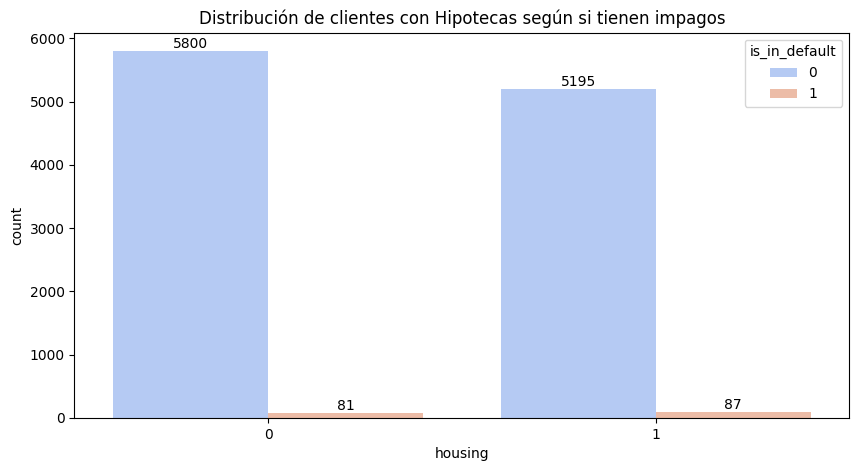

In [81]:
plt.figure(figsize=(10, 5))
num_job = sns.countplot(data=df_f, x='housing', order=df_f['housing'].value_counts().index, hue = 'is_in_default',palette='coolwarm')
for bar in num_job.containers: # número en las barras
    num_job.bar_label(bar)
plt.title('Distribución de clientes con Hipotecas según si tienen impagos')
plt.show()

#### Prueba Chi-cuadrado housing

In [82]:
crosstab_housing = pd.crosstab(df_f['housing'], df_f['is_in_default'])
# Cálculo de la Chi cuadrado y p-valor
chi2, p, dof, expected = stats.chi2_contingency(crosstab_housing)

print(crosstab_housing)
print("Valor de Chi cuadrado:", chi2)
print("P-valor:", p)

is_in_default     0   1
housing                
0              5800  81
1              5195  87
Valor de Chi cuadrado: 1.190423032087388
P-valor: 0.2752442423158278


Con un p-valor de 0.2752, no podemos concluir que haya una relación significativa entre el hecho de tener una hipoteca y el incumplimiento de crédito. Tener una hipoteca no parece estar asociado con un mayor riesgo de incumplimiento de crédito en esta muestra.

In [83]:

crosstab_housing['%_0'] = ((crosstab_housing[0] / crosstab_housing.sum(axis=1)) * 100).round(2)
crosstab_housing['%_1'] = ((crosstab_housing[1] / crosstab_housing.sum(axis=1)) * 100).round(2)
print(crosstab_housing)

is_in_default     0   1    %_0   %_1
housing                             
0              5800  81  98.62  1.35
1              5195  87  98.35  1.62


Podemos observar que la cantidad de clientes con impagos que tienen contratada una hipoteca es muy similar.

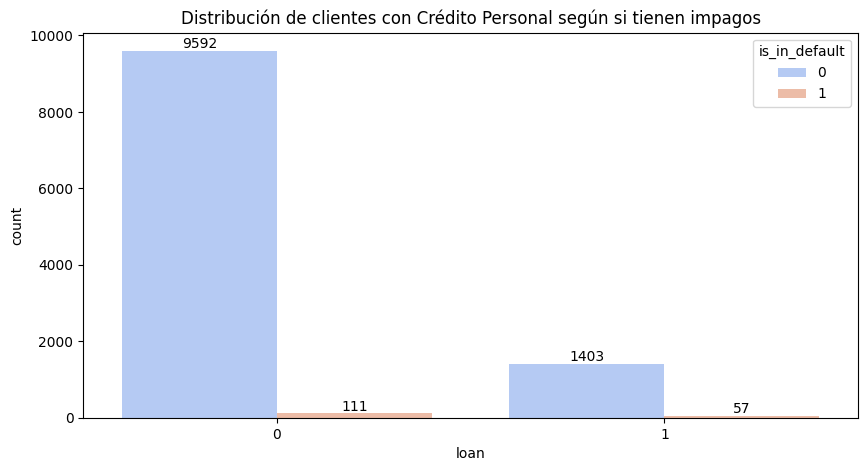

In [84]:
plt.figure(figsize=(10, 5))
num_loan = sns.countplot(data=df_f, x='loan', order=df_f['loan'].value_counts().index, hue = 'is_in_default',palette='coolwarm')
for bar in num_loan.containers: # número en las barras
    num_loan.bar_label(bar)
plt.title('Distribución de clientes con Crédito Personal según si tienen impagos')
plt.show()

#### Prueba Chi-cuadrado loan

In [85]:
crosstab_loan = pd.crosstab(df_f['loan'], df_f['is_in_default'])
# Cálculo de la Chi cuadrado y p-valor
chi2, p, dof, expected = stats.chi2_contingency(crosstab_loan)

print(crosstab_loan)
print("Valor de Chi cuadrado:", chi2)
print("P-valor:", p)

is_in_default     0    1
loan                    
0              9592  111
1              1403   57
Valor de Chi cuadrado: 63.37346094102129
P-valor: 1.7100648960425175e-15


Con un p-valor tan pequeño, podemos afirmar que hay una relación significativa entre tener un préstamo personal y el riesgo de incumplimiento de crédito. Es decir, las personas que tienen un préstamo personal tienen más probabilidades de incurrir en impagos en comparación con aquellas que no tienen un préstamo personal.

In [86]:

crosstab_loan['%_0'] = ((crosstab_loan[0] / crosstab_loan.sum(axis=1)) * 100).round(2)
crosstab_loan['%_1'] = ((crosstab_loan[1] / crosstab_loan.sum(axis=1)) * 100).round(2)
print(crosstab_loan)

is_in_default     0    1    %_0   %_1
loan                                 
0              9592  111  98.86  1.13
1              1403   57  96.10  3.66


Podemos observar que los clientes que tienen un crédito el 3,66% tienen un impago, es más del doble en comparación a los que no tienen un crédito personal.

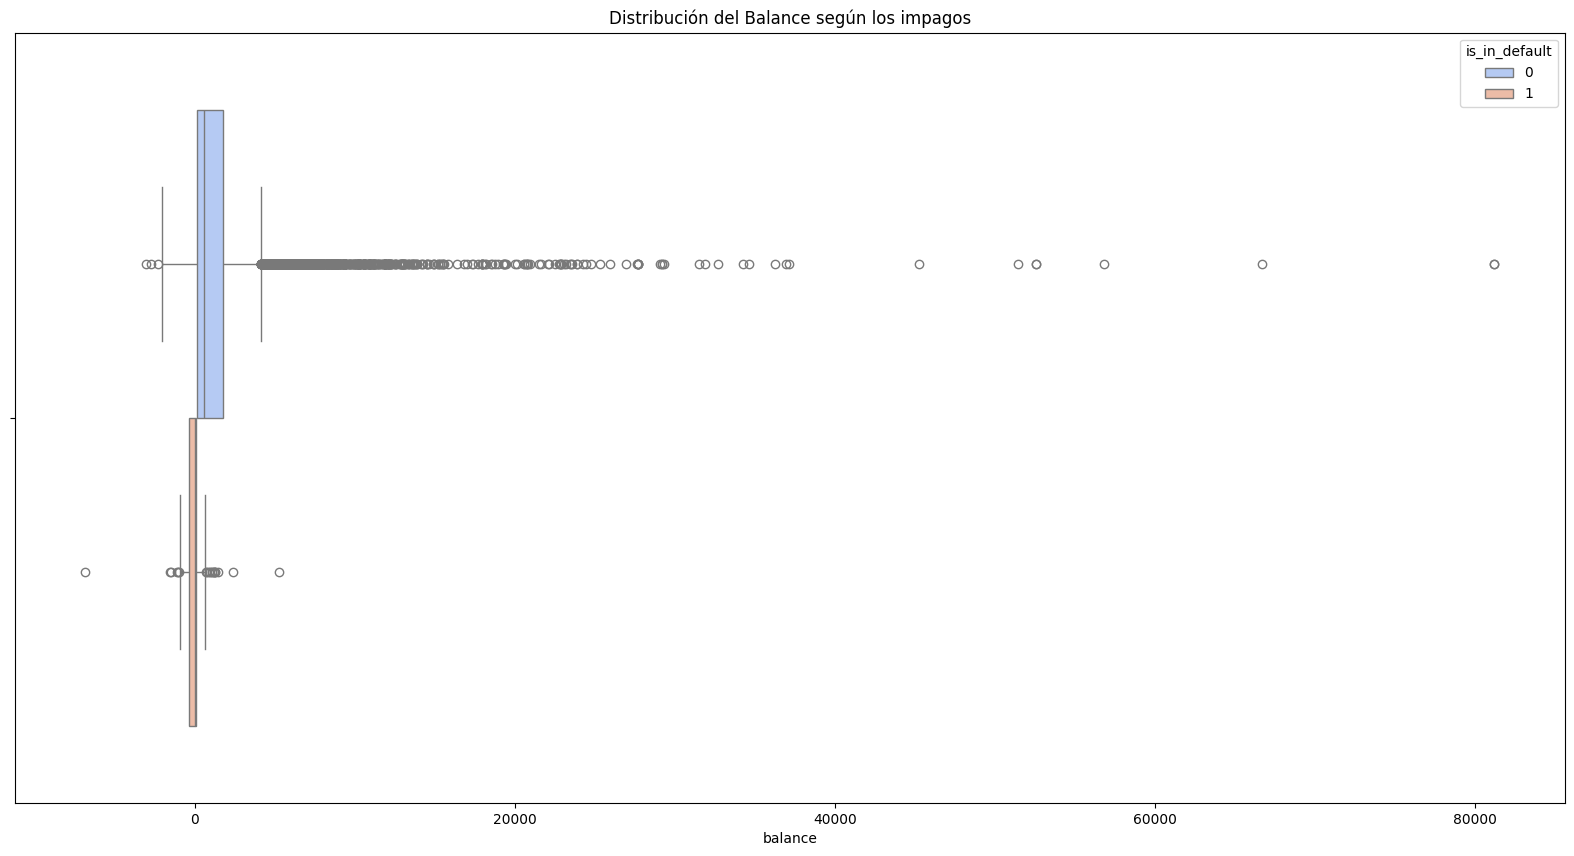

In [87]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_f, x='balance', hue='is_in_default', palette='coolwarm')
plt.title('Distribución del Balance según los impagos')
plt.show()

Como se observa hay muchos más outliers en el boxplot de los clientes que no tienen impagos, mientras que los clientes con impagos presentan muchos menos outliers. También esto hacer ver al departamento de finanzas que los outliers de los clientes con impagos son los que tienen balance positivo.

In [88]:
df_f['is_in_default'].value_counts()

is_in_default
0    10995
1      168
Name: count, dtype: int64

Recogiendo una de las cuestiones tratadas anteriormente, vamos a ver que nos dicen los datos de los clientes con balance 0

### Balance 0

In [89]:
df_balance_0 = df_f[(df_f['balance'] == 0)]
df_balance_0

,id,age,job,marital,is_in_default,balance,housing,loan
6,7,42.0,management,single,0,0,1,1
100,101,35.0,blue-collar,divorced,0,0,1,0
125,126,33.0,blue-collar,married,0,0,1,0
139,140,28.0,self-employed,single,0,0,1,0
150,151,30.0,entrepreneur,single,0,0,1,1
...,...,...,...,...,...,...,...,...
11137,11138,31.0,management,single,0,0,1,0
11145,11146,60.0,retired,married,0,0,1,0
11148,11149,44.0,unemployed,married,0,0,0,0
11161,11162,43.0,technician,married,0,0,0,1


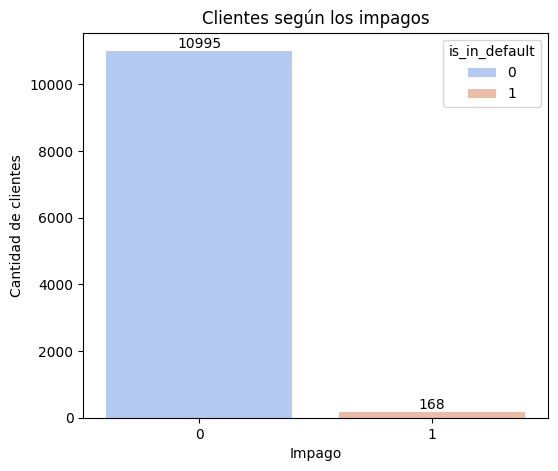

In [90]:
plt.figure(figsize=(6, 5))
num_iid = sns.countplot(data=df_f, x='is_in_default',order=df_f['is_in_default'].value_counts().index, hue='is_in_default', palette='coolwarm')
for bar in num_iid.containers:
    num_iid.bar_label(bar)
plt.title('Clientes según los impagos')
plt.xlabel('Impago')
plt.ylabel('Cantidad de clientes')
plt.show()

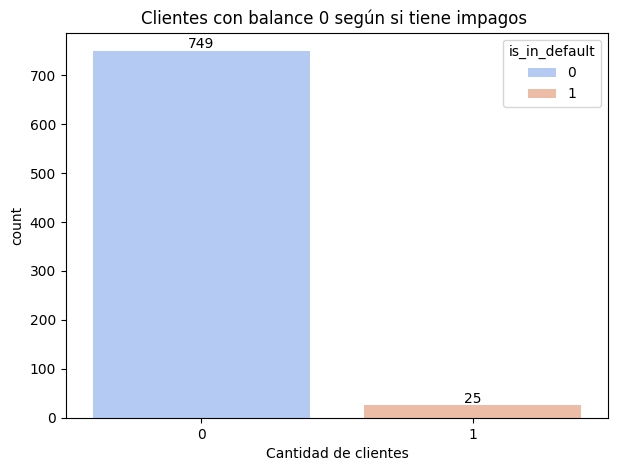

In [91]:
plt.figure(figsize=(7, 5))
num_b0 = sns.countplot(data=df_balance_0, x='is_in_default', order=df_f['is_in_default'].value_counts().index, hue= 'is_in_default',palette='coolwarm')
for bar in num_b0.containers: # número en las barras
    num_b0.bar_label(bar)
plt.title('Clientes con balance 0 según si tiene impagos ')
plt.xlabel('Cantidad de clientes')
plt.show()

Encontramos que las personas que tienen balance 0 y tienen impagos es de 25, podría indicar varias cosas, como que el cliente ya ha pagado la deuda y aún no se ha visto reflejado el cambio o que el cliente ha pagado parte del impago y se ha quedado a 0.

### Impagos

In [92]:
df_impagos = df_f[(df_f['is_in_default'] == 1)]
df_impagos.head()

,id,age,job,marital,is_in_default,balance,housing,loan
31,32,32.0,blue-collar,married,1,-1,1,0
115,116,30.0,blue-collar,single,1,239,1,0
211,212,42.0,technician,single,1,-1129,1,0
214,215,44.0,management,divorced,1,-411,1,0
217,218,40.0,self-employed,married,1,-754,1,1


C:\Users\Adam\AppData\Local\Temp\ipykernel_11356\4265888641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  num_job_i = sns.countplot(data=df_impagos, x='job', order=df_impagos['job'].value_counts().index,palette='coolwarm')


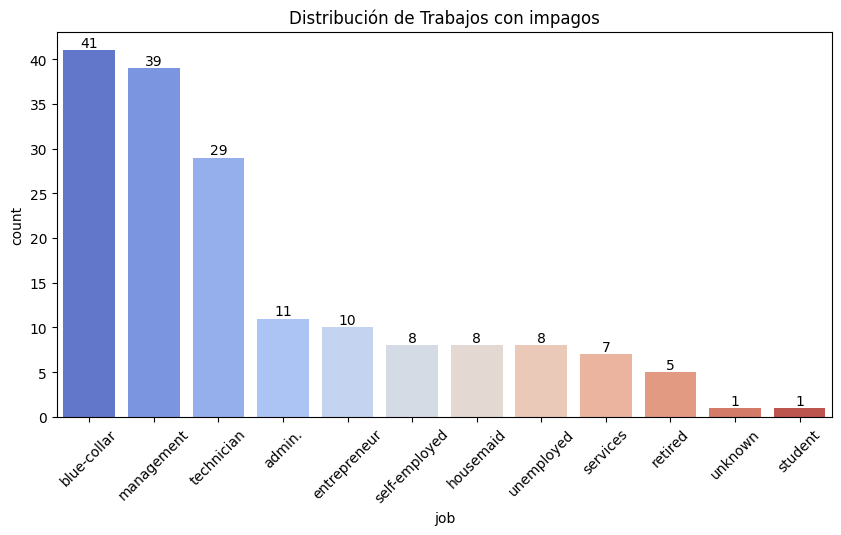

In [93]:
plt.figure(figsize=(10, 5))
num_job_i = sns.countplot(data=df_impagos, x='job', order=df_impagos['job'].value_counts().index,palette='coolwarm')
for bar in num_job_i.containers: # número en las barras
    num_job_i.bar_label(bar)
plt.title('Distribución de Trabajos con impagos')
plt.xticks(rotation=45)
plt.show()

In [94]:
print(df_impagos['job'].value_counts())
print(df_impagos['loan'].value_counts())

job
blue-collar      41
management       39
technician       29
admin.           11
entrepreneur     10
self-employed     8
housemaid         8
unemployed        8
services          7
retired           5
unknown           1
student           1
Name: count, dtype: int64
loan
0    111
1     57
Name: count, dtype: int64


C:\Users\Adam\AppData\Local\Temp\ipykernel_11356\540538435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  num_loan_i = sns.countplot(data=df_impagos, x='loan', order=df_impagos['loan'].value_counts().index,palette='coolwarm')


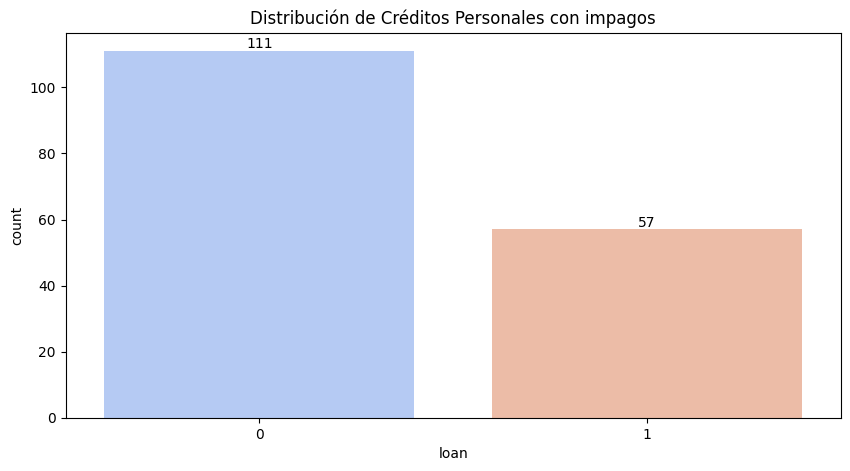

In [95]:
plt.figure(figsize=(10, 5))
num_loan_i = sns.countplot(data=df_impagos, x='loan', order=df_impagos['loan'].value_counts().index,palette='coolwarm')
for bar in num_loan_i.containers: # número en las barras
    num_loan_i.bar_label(bar)
plt.title('Distribución de Créditos Personales con impagos')
plt.show()

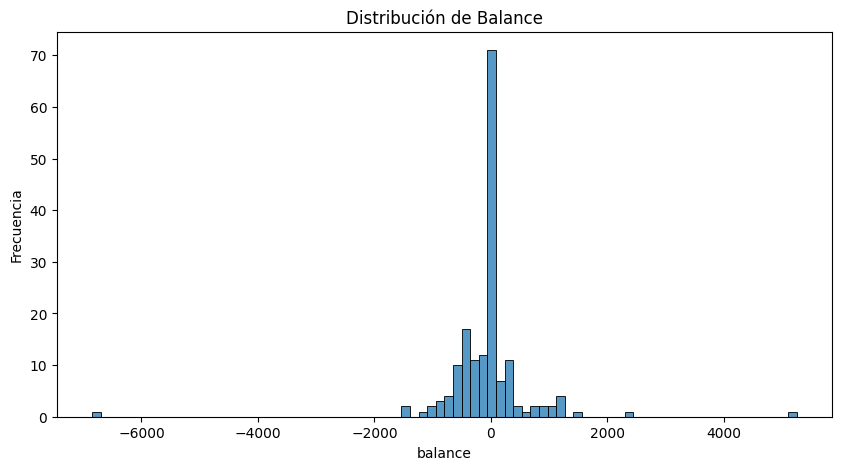

In [96]:
plt.figure(figsize=(10, 5))
sns.histplot(df_impagos['balance'])
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar que los clientes con impagos o tienen saldos positivos muy bajos o la mayoria de ellos se mueve entre el 0 y el saldo negativo

In [97]:
df_impagos['balance'].value_counts()

balance
 0       25
-1        3
 11       2
 4        2
 72       2
         ..
-1042     1
-405      1
-274      1
-930      1
 23       1
Name: count, Length: 137, dtype: int64

In [98]:
df_impagos.describe()

,id,age,is_in_default,balance,housing,loan
count,168.000000,168.000000,168.0,168.000000,168.000000,168.000000
mean,6377.553571,40.130952,1.0,-61.803571,0.517857,0.339286
std,3425.796324,9.825154,0.0,827.742361,0.501175,0.474882
min,32.000000,24.000000,1.0,-6847.000000,0.000000,0.000000
25%,4598.000000,32.000000,1.0,-344.000000,0.000000,0.000000
50%,7205.000000,39.500000,1.0,0.000000,1.000000,0.000000
75%,9116.250000,47.000000,1.0,65.500000,1.000000,1.000000
max,11148.000000,71.000000,1.0,5249.000000,1.000000,1.000000


## PREGUNTA DE NEGOCIO

### ¿En que medida los clientes con saldos más bajos están en más riesgo de incumplimiento del crédito y como tenemos que ajustar nuestras políticas de crédito para mitigar ese riesgo?

* Seguidamente analizaremos en profundidad las varibles que más nos convienen para resolver la duda que se nos presenta

### Analisis del incumplimiento de crédito

La estrategia a seguir es la de segmentar por grupos el balance. Se segmentará a través de los quartiles para determinar los rangos del balance que irán desde el muy bajo al muy alto. Esto nos ayudará a identificar claramente el porcentaje de clientes en riesgo de impago dependiendo de su balance.

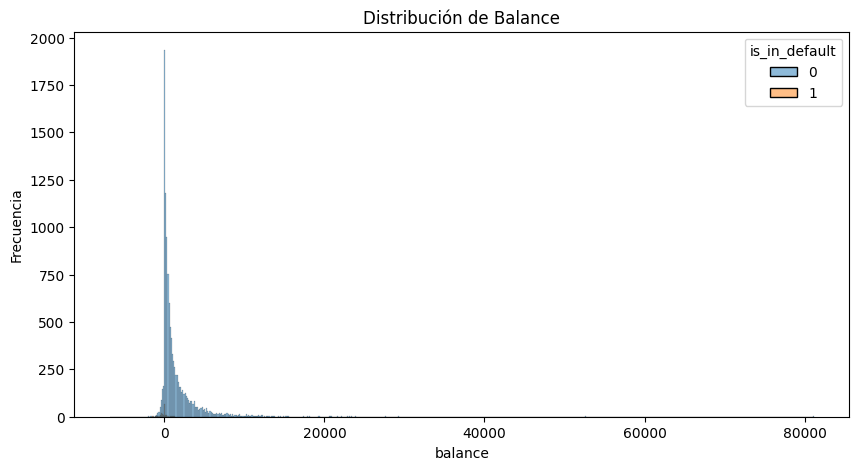

In [99]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_f,x = 'balance', hue ='is_in_default')
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

Se calcularán los cuartiles para identificar los outliers en los balances de los clientes y clasificarlos en diferentes rangos. Esta clasificación permitirá observar patrones en los balances más bajos, que podrían estar asociados con un mayor riesgo de impago. Con esta información, se podrán ajustar las políticas de crédito para mitigar posibles riesgos.

In [100]:

def quartiles(qua):
    # calculamos los rangos de los 3 quartiles
    q1 = qua.quantile(0.25)
    q2 = qua.quantile(0.50) 
    q3 = qua.quantile(0.75)

    iqr = q3 - q1 #calculamos el IQR interquartilic range

    # esto sirve para ver el quartil minimo y el quartil maximo
    min_q = q1 - 1.5*iqr
    max_q = q3 + 1.5*iqr
    
    return q1, q2, q3, min_q, max_q

q1, q2, q3, min_q, max_q = quartiles(df_f['balance'])

print(f"Q1 (Primer cuartil): {q1}")
print(f"Q2 (Mediana): {q2}")
print(f"Q3 (Tercer cuartil): {q3}")
print(f"Mínimo (Outlier mínimo): {min_q}")
print(f"Máximo (Outlier máximo): {max_q}")


Q1 (Primer cuartil): 122.0
Q2 (Mediana): 550.0
Q3 (Tercer cuartil): 1708.5
Mínimo (Outlier mínimo): -2257.75
Máximo (Outlier máximo): 4088.25


Con los resultados obtenidos, la clasificación de los saldos se basa en los siguientes rangos:

    Saldo Muy Bajo: Menor que -2257.75 (Outlier mínimo).
    Saldo Bajo: Entre -2257.75 y 122.0 (Primer cuartil, Q1).
    Saldo Medio: Entre 122.0 y 550.0 (Mediana, Q2).
    Saldo Medio Alto: Entre 550.0 y 1708.5 (Tercer cuartil, Q3).
    Saldo Alto: Entre 1708.5 y 4088.25 (Outlier máximo).
    Saldo Muy Alto: Mayor que 4088.25 (Outlier máximo).

Esta clasificación permite categorizar a los clientes según su saldo y evaluar el riesgo de impago en función de su posición en estos rangos.

In [101]:
def rango_balance(balance):
    if balance < min_q:
        return "Saldo Muy Bajo"
    elif balance < q1:
        return "Saldo Bajo"
    elif balance < q2:
        return "Saldo Medio"
    elif balance < q3:
        return "Saldo Medio Alto"
    elif balance <= max_q:  # Incluye el límite máximo
        return "Saldo Alto"
    else:  # Todo lo que sea mayor a max_q
        return "Saldo Muy Alto"

df_f['estado_balance'] = df_f['balance'].apply(rango_balance)
df_f

C:\Users\Adam\AppData\Local\Temp\ipykernel_11356\3867807505.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['estado_balance'] = df_f['balance'].apply(rango_balance)


,id,age,job,marital,is_in_default,balance,housing,loan,estado_balance
0,1,59.0,admin.,married,0,2343,1,0,Saldo Alto
1,2,59.0,admin.,married,0,2343,1,0,Saldo Alto
2,3,56.0,admin.,married,0,45,0,0,Saldo Bajo
3,4,41.0,technician,married,0,1270,1,0,Saldo Medio Alto
4,5,55.0,services,married,0,2476,1,0,Saldo Alto
...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,0,1,1,0,Saldo Bajo
11159,11160,39.0,services,married,0,733,0,0,Saldo Medio Alto
11160,11161,32.0,technician,single,0,29,0,0,Saldo Bajo
11161,11162,43.0,technician,married,0,0,0,1,Saldo Bajo


In [102]:
df_f['estado_balance'].value_counts()


estado_balance
Saldo Medio Alto    2795
Saldo Medio         2794
Saldo Bajo          2779
Saldo Alto          1740
Saldo Muy Alto      1051
Saldo Muy Bajo         4
Name: count, dtype: int64

C:\Users\Adam\AppData\Local\Temp\ipykernel_11356\4149719431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  num_saldo = sns.countplot(data=df_f, x='estado_balance', order = ordenar, palette='coolwarm_r')


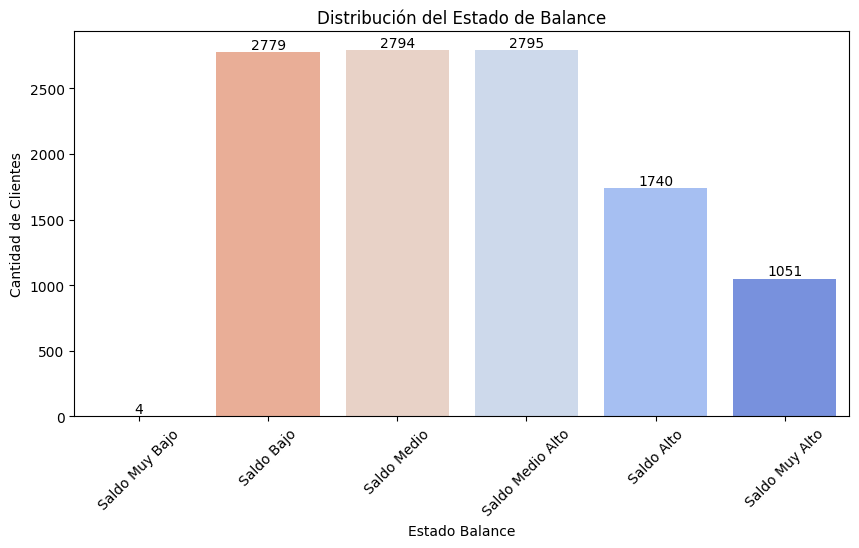

In [103]:
ordenar = ["Saldo Muy Bajo", "Saldo Bajo", "Saldo Medio", "Saldo Medio Alto", "Saldo Alto", "Saldo Muy Alto"]
plt.figure(figsize=(10, 5))
num_saldo = sns.countplot(data=df_f, x='estado_balance', order = ordenar, palette='coolwarm_r')
for bar in num_saldo.containers: # número en las barras
    num_saldo.bar_label(bar)
plt.title('Distribución del Estado de Balance')
plt.xlabel('Estado Balance')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()

Esta primera visión de los resultado nos muestra que en los extremos hay muy baja representación sobretodo en el outlier mínimo que apenas tiene 4 representaciones. Esta muestra es buena ya que quiere decir que hay pocos clientes en riesgo extremo, pero aún así en la parte de Saldo Bajo tenemos un número considerable de clientes. 

### Prueba chi-cuadrado

In [104]:

crosstab_estado_balance = pd.crosstab(df_f['estado_balance'], df_f['is_in_default'])

# Cálculo de la Chi cuadrado y p-valor
chi2, p, dof, expected = stats.chi2_contingency(crosstab_estado_balance)

print(crosstab_estado_balance)
print("Valor de Chi cuadrado:", chi2)
print("P-valor:", p)


is_in_default        0    1
estado_balance             
Saldo Alto        1739    1
Saldo Bajo        2643  136
Saldo Medio       2777   17
Saldo Medio Alto  2783   12
Saldo Muy Alto    1050    1
Saldo Muy Bajo       3    1
Valor de Chi cuadrado: 305.8553038429418
P-valor: 5.517092505951785e-64


Realizando la prueba de Chi-cuadrado, podemos llegar a la conclusión de que al tener un valor alto de 305, indica que las diferencias no son aleatorias.

P-valor: 5.52e-64
Este número extremadamente bajo indica que la probabilidad de que las diferencias observadas entre las categorías de estado_balance e is_in_default sean producto del azar es prácticamente nula.

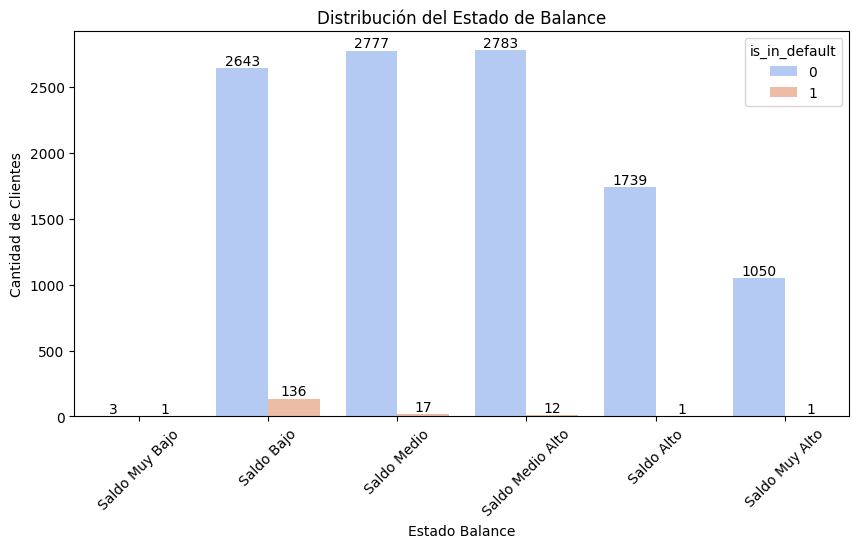

In [105]:
ordenar = ["Saldo Muy Bajo", "Saldo Bajo", "Saldo Medio", "Saldo Medio Alto", "Saldo Alto", "Saldo Muy Alto"]
plt.figure(figsize=(10, 5))
num_saldo = sns.countplot(data=df_f, x='estado_balance',hue='is_in_default', order = ordenar, palette='coolwarm')
for bar in num_saldo.containers: # número en las barras
    num_saldo.bar_label(bar)
plt.title('Distribución del Estado de Balance')
plt.xlabel('Estado Balance')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()

In [106]:

#Calculo del porcentaje
crosstab_estado_balance['%_0'] = (crosstab_estado_balance[0] / (crosstab_estado_balance[0] + crosstab_estado_balance[1]) * 100).round(2)
crosstab_estado_balance['%_1'] = (crosstab_estado_balance[1] / (crosstab_estado_balance[0] + crosstab_estado_balance[1]) * 100).round(2)
print(crosstab_estado_balance)


is_in_default        0    1    %_0    %_1
estado_balance                           
Saldo Alto        1739    1  99.94   0.06
Saldo Bajo        2643  136  95.11   4.89
Saldo Medio       2777   17  99.39   0.61
Saldo Medio Alto  2783   12  99.57   0.43
Saldo Muy Alto    1050    1  99.90   0.10
Saldo Muy Bajo       3    1  75.00  25.00


Viendo los porcentajes que han salido en cada rango de balance, podemos observar claramente cuáles tienen más riesgo de impagos. Vamos a visualizar los resultados en una gráfica.

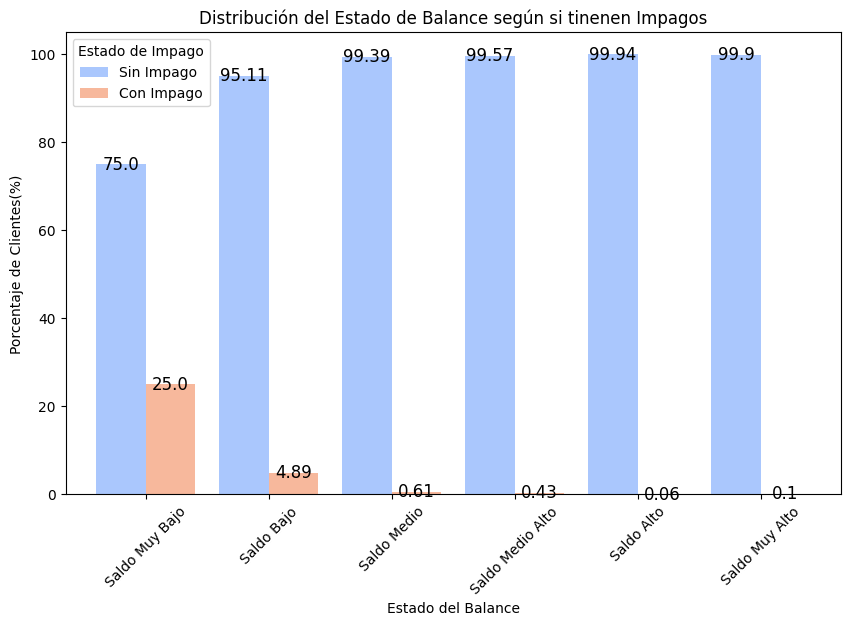

In [107]:
crosstab_estado_balance = crosstab_estado_balance.loc[ordenar]
colores = sns.color_palette("coolwarm", n_colors=2)
plt.figure(figsize=(10, 6))
crosstab_estado_balance[['%_0', '%_1']].plot(kind='bar', width=0.8, color=colores, ax=plt.gca())
# Añadir las etiquetas de porcentaje en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center', color='black', fontsize=12)
plt.title('Distribución del Estado de Balance según si tinenen Impagos')
plt.xlabel('Estado del Balance')
plt.ylabel('Porcentaje de Clientes(%)')
plt.xticks(range(len(crosstab_estado_balance)), crosstab_estado_balance.index, rotation=45)
plt.legend(title='Estado de Impago', labels=['Sin Impago', 'Con Impago'])
plt.show()

Con la vista del gráfico, podemos observar que de los clientes con 'Saldo Muy Bajo', el 25% está con impagos es decir 1 de cada 4, es un porcentaje muy elevado dentro de los clientes de esa agrupación. En 'Saldo Bajo' tenemos un 4,89% de impagos que respecto al resto de categorias, es un número elevado. Estas dos agrupaciones son las que tienen más riesgo de impago. Por lo tanto son las categorias en las que se tendrán que dedicar mayores esfuerzos para mitigar los impagos.

C:\Users\Adam\AppData\Local\Temp\ipykernel_11356\527350043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impagos_default['estado_balance'] = pd.Categorical(df_impagos_default['estado_balance'], categories=ordenar, ordered=True)#ordenar categoria


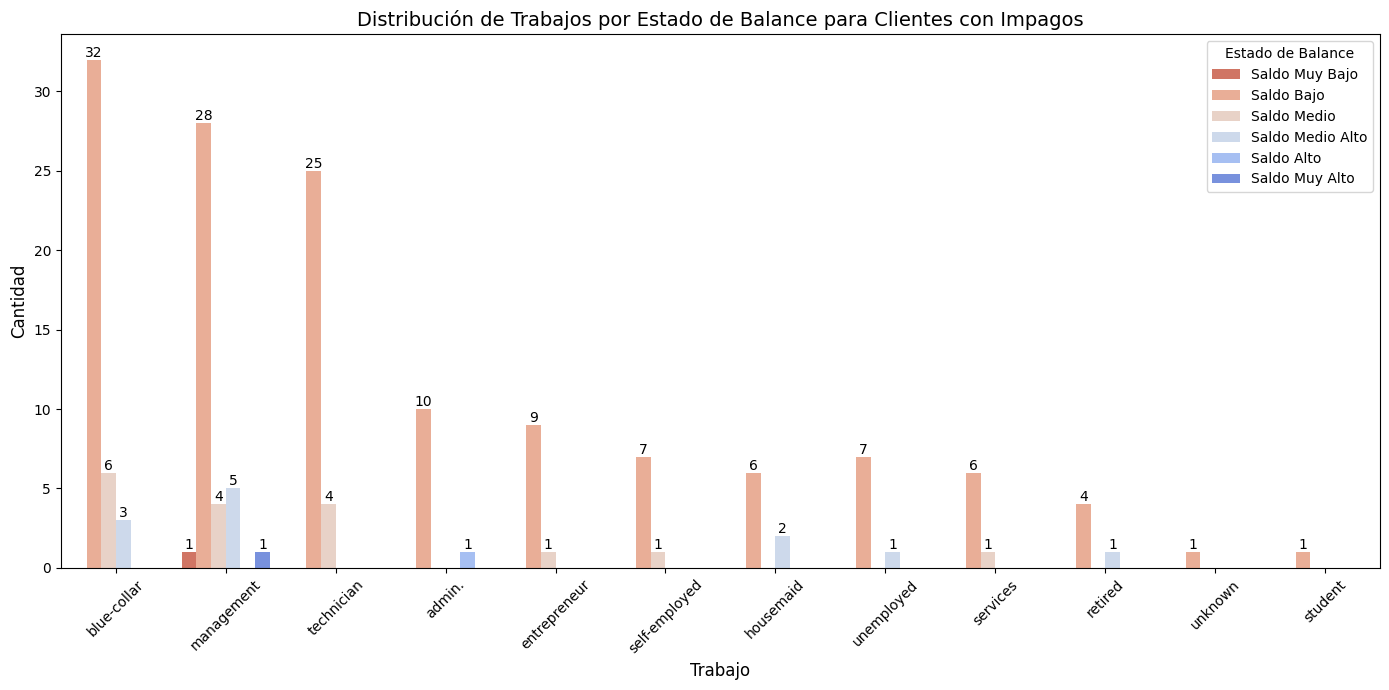

In [108]:
ordenar = ["Saldo Muy Bajo", "Saldo Bajo", "Saldo Medio", "Saldo Medio Alto", "Saldo Alto", "Saldo Muy Alto"]
df_impagos_default = df_f[df_f['is_in_default'] == 1] #filtro 
df_impagos_default['estado_balance'] = pd.Categorical(df_impagos_default['estado_balance'], categories=ordenar, ordered=True)#ordenar categoria
plt.figure(figsize=(14, 7))
bar_plot=sns.countplot(
    data=df_impagos_default, 
    x='job', 
    hue='estado_balance', 
    palette='coolwarm_r',
    order=df_impagos_default['job'].value_counts().index  # Ordena los trabajos según su frecuencia
)
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10) #números en las barras
plt.title('Distribución de Trabajos por Estado de Balance para Clientes con Impagos', fontsize=14)
plt.xlabel('Trabajo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Estado de Balance')
plt.tight_layout()
plt.show()


C:\Users\Adam\AppData\Local\Temp\ipykernel_11356\3404992196.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_impagos_default.pivot_table(index='job', columns='estado_balance', values='id', aggfunc='count')


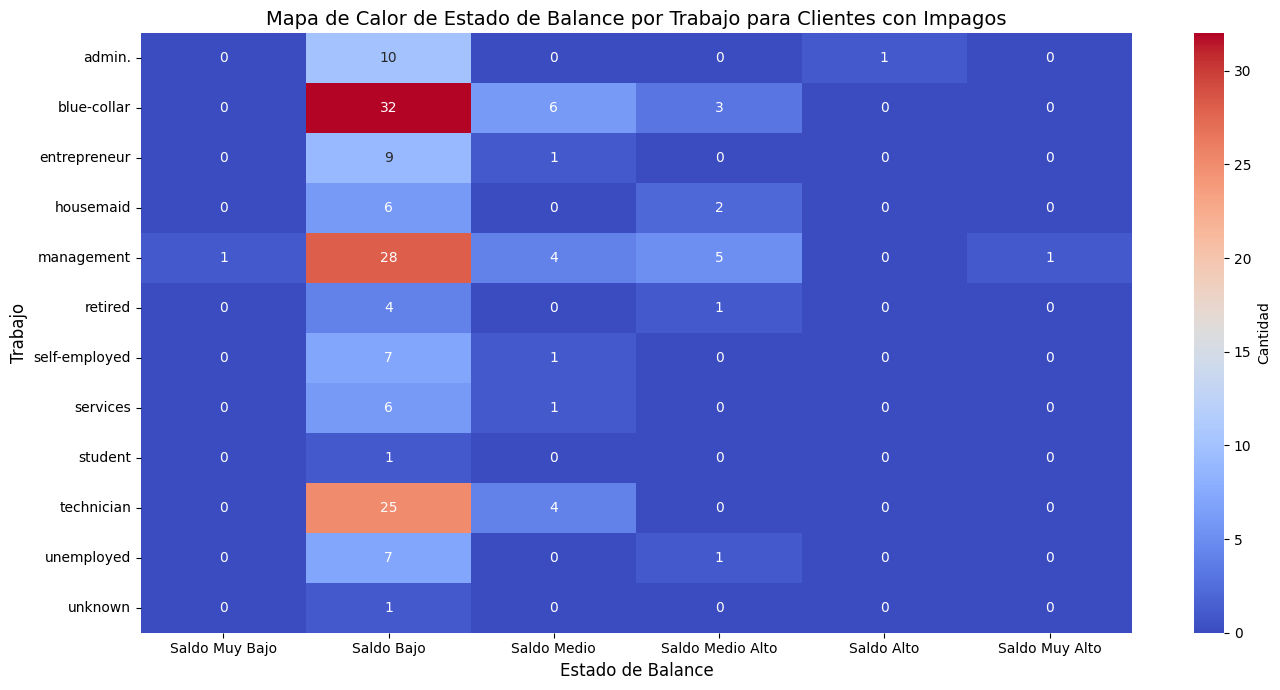

In [109]:
heatmap_data = df_impagos_default.pivot_table(index='job', columns='estado_balance', values='id', aggfunc='count')
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Cantidad'})
plt.title('Mapa de Calor de Estado de Balance por Trabajo para Clientes con Impagos', fontsize=14)
plt.xlabel('Estado de Balance', fontsize=12)
plt.ylabel('Trabajo', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Adam\AppData\Local\Temp\ipykernel_11356\3694999817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impagos_default['estado_balance'] = pd.Categorical(df_impagos_default['estado_balance'], categories=ordenar, ordered=True)#ordenar categoria


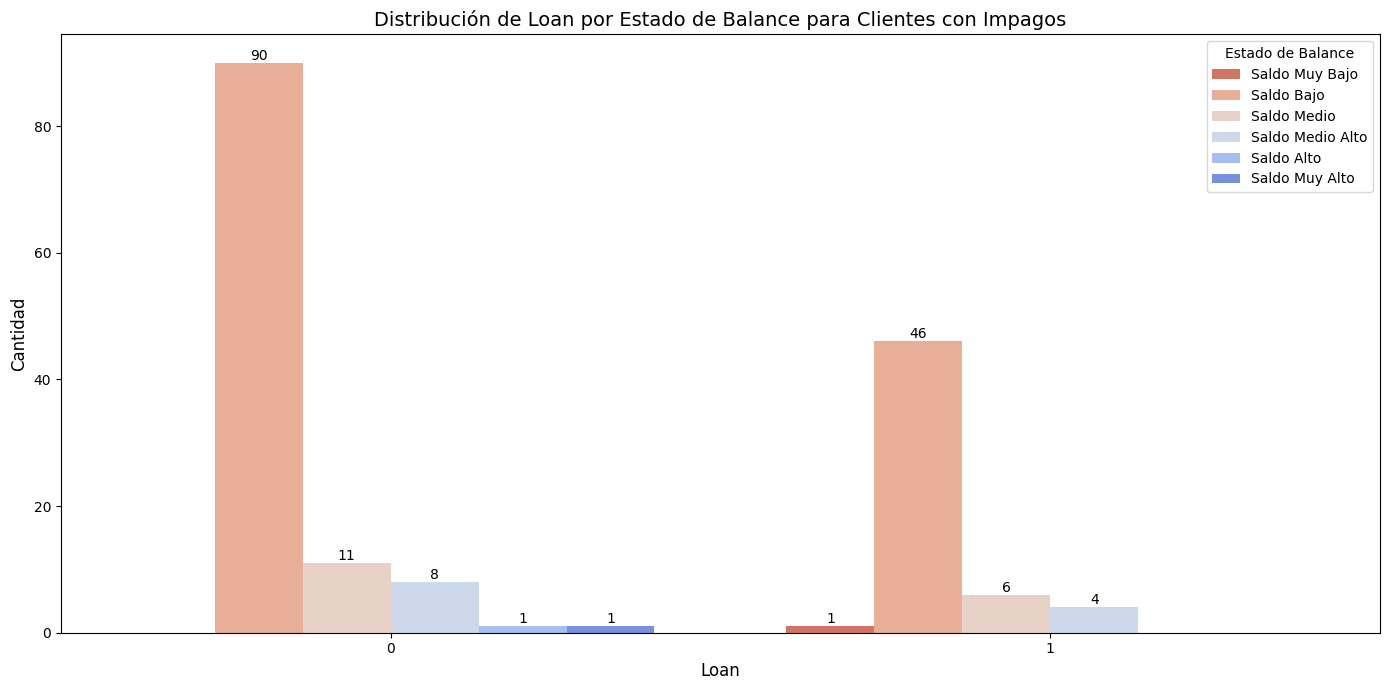

In [110]:
ordenar = ["Saldo Muy Bajo", "Saldo Bajo", "Saldo Medio", "Saldo Medio Alto", "Saldo Alto", "Saldo Muy Alto"]
df_impagos_default = df_f[df_f['is_in_default'] == 1] #filtro 
df_impagos_default['estado_balance'] = pd.Categorical(df_impagos_default['estado_balance'], categories=ordenar, ordered=True)#ordenar categoria
plt.figure(figsize=(14, 7))
bar_plot=sns.countplot(
    data=df_impagos_default, 
    x='loan', 
    hue='estado_balance', 
    palette='coolwarm_r',
    order=df_impagos_default['loan'].value_counts().index  # Ordena los trabajos según su frecuencia
)
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10) #números en las barras
plt.title('Distribución de Loan por Estado de Balance para Clientes con Impagos', fontsize=14)
plt.xlabel('Loan', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(title='Estado de Balance')
plt.tight_layout()
plt.show()

## CONCLUSIONES

Saldo Muy Bajo: El 25% de los clientes con saldo muy bajo están en impago, lo que es un porcentaje notablemente alto. Solo hay 4 clientes con este saldo, pero el hecho de que una cuarta parte esté en impago indica que los clientes con saldos más bajos podrían estar en mayor riesgo de incumplimiento.

Saldo Bajo: El 4.89% de los clientes con saldo bajo están en impago, lo que sigue siendo un porcentaje relevante, aunque menor que el de los clientes con saldo muy bajo.

Saldo Medio: El 0.61% de los clientes con saldo medio están en impago. La proporción sigue siendo pequeña, lo que indica que los clientes con saldos más altos tienen menos riesgo de incumplimiento.

Saldo Alto y Muy Alto: Los clientes con saldos altos o muy altos tienen una proporción de impagos muy baja, entre el 0.06% y el 0.10%, lo que indica que estos clientes tienen un riesgo mínimo de impago.

Es por eso que los clientes con Saldo Muy Bajo y Bajo son los clientes con mayor riesgo de incumplimiento de crédito.